=== Reporte de Clasificación - Árbol de Decisión ===
                  precision    recall  f1-score   support

Derecho de autor       0.98      1.00      0.99       118
          Marcas       1.00      1.00      1.00       134
        Patentes       1.00      0.97      0.99       120

        accuracy                           0.99       372
       macro avg       0.99      0.99      0.99       372
    weighted avg       0.99      0.99      0.99       372



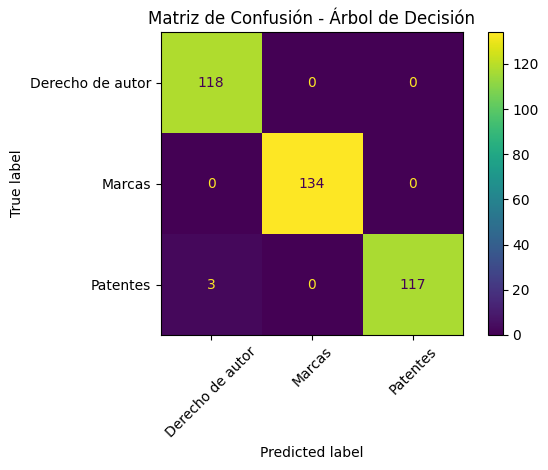

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import spacy

# Cargar modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Función para preprocesar texto
def preprocesar(texto):
    doc = nlp(texto.lower())
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])



# Leer archivo CSV y aplicar preprocesamiento
df = pd.read_csv('./activos_pi_2.csv', encoding='latin1')
df["descripcion"] = df["descripcion"].apply(preprocesar)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(df["descripcion"], df["categoria"], test_size=0.2, random_state=42)

# Vectorización TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Modelo Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_tfidf, y_train)

# Predicciones
y_pred = clf.predict(X_test_tfidf)

# Resultados
print("=== Reporte de Clasificación - Árbol de Decisión ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation=45)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.tight_layout()
plt.show()


In [3]:
# Nueva descripción para probar
nueva_descripcion = ["obra musical sinfónica para violines"]

# Vectorizar y predecir
nueva_tfidf = vectorizer.transform(nueva_descripcion)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: obra musical sinfónica para violines
Predicción de categoría: Derecho de autor


In [4]:
# Nueva descripción para probar
nueva_descripcion = ["un dispositivo mejorado para la comunicación inalambrica"]

# Vectorizar y predecir
nueva_tfidf = vectorizer.transform(nueva_descripcion)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: un dispositivo mejorado para la comunicación inalambrica
Predicción de categoría: Patentes


In [5]:
# Nueva descripción para probar
nueva_descripcion = ["un logotipo para una empresa"]

# Vectorizar y predecir
nueva_tfidf = vectorizer.transform(nueva_descripcion)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: un logotipo para una empresa
Predicción de categoría: Marcas


In [6]:
# Nueva descripción para probar
nueva_descripcion = ["diseño estético de una botella"]

# Vectorizar y predecir
nueva_tfidf = vectorizer.transform(nueva_descripcion)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: diseño estético de una botella
Predicción de categoría: Derecho de autor
